<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

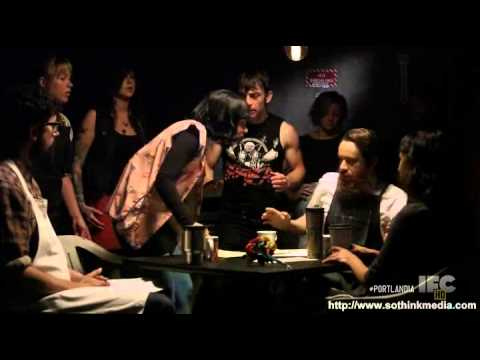

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\soobt\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [204]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [205]:
# Process star ratings
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [206]:
# Only need to address these five values
shops['star_rating'] = shops['star_rating'].str.slice(start=0, stop=2).astype(int)

In [207]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [208]:
# Remove the dates from the text reviews
shops['full_review_text'] = shops['full_review_text'].str.split('/').apply(lambda x: "".join(x[2:])).str.slice(start=5).str.strip()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [209]:
from collections import Counter
import re
 
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [210]:
tokenizer = Tokenizer(nlp.vocab)

In [211]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [214]:
tokens[2].index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [223]:
tokens[0][0].index

<function str.index>

In [55]:
shops['tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

In [56]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

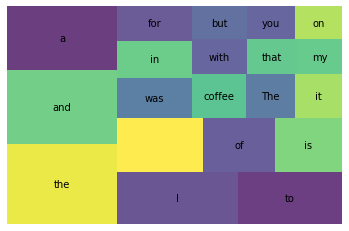

In [61]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [63]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

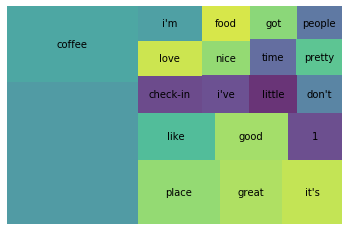

In [64]:
wc = count(shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [68]:
wc_top20.iloc[0,0]

' '

In [180]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '.', '-',
                                            'coffee', 'shop', 'latte', 'iced',
                                            '1', "2", '3', '4', '5', 
                                            'austin', 'Austin', 'iPad',
                                            'I\'m', 'i\'m', 'it\'s', 'I\'ve', 'i\'ve',
                                            'place', 'people'])

In [97]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

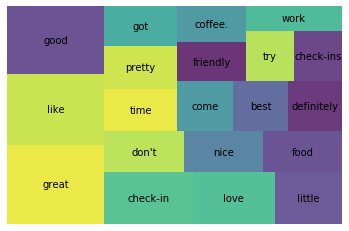

In [98]:
wc = count(shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [184]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

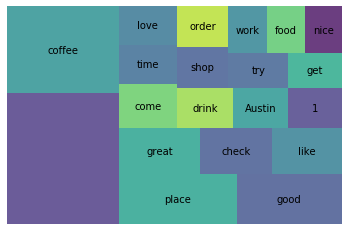

In [171]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [194]:
lis = []
for l in shops['lemmas']:
    lis.append(list(set(l) - STOP_WORDS))

shops['lemmas'] = lis

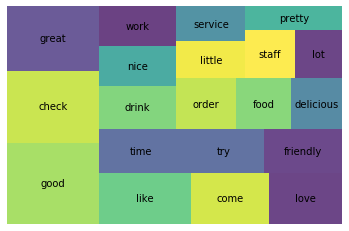

In [196]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [197]:
wcGood = count(shops[shops['star_rating'] > 3]['lemmas'])
wcBad = count(shops[shops['star_rating'] <= 3]['lemmas'])

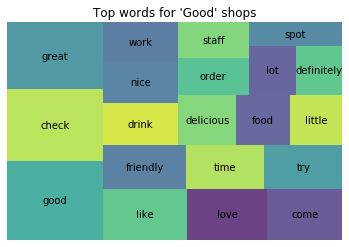

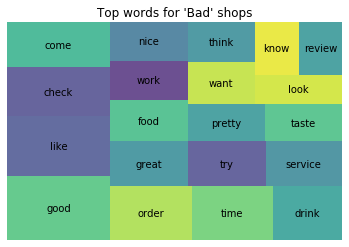

In [198]:
wc_top20Good = wcGood[wcGood['rank'] <= 20]

squarify.plot(sizes=wc_top20Good['pct_total'], label=wc_top20Good['word'], alpha=.8 )
plt.title('Top words for \'Good\' shops')
plt.axis('off')
plt.show()

wc_top20Bad = wcBad[wcBad['rank'] <= 20]

squarify.plot(sizes=wc_top20Bad['pct_total'], label=wc_top20Bad['word'], alpha=.8 )
plt.title('Top words for \'Bad\' shops')
plt.axis('off')
plt.show()

In [199]:
wc = pd.merge(wcGood, wcBad, how='inner', on='word', suffixes=('_good', '_bad'))

In [112]:
wc.head()

,word,appears_in_good,count_good,rank_good,pct_total_good,cul_pct_total_good,appears_in_pct_good,appears_in_bad,count_bad,rank_bad,pct_total_bad,cul_pct_total_bad,appears_in_pct_bad
0,great,2174,2902,1.0,0.010227,0.010227,0.354072,264,348,8.0,0.004275,0.044700,0.178862
1,good,1643,2180,2.0,0.007683,0.017910,0.267590,441,599,2.0,0.007358,0.017602,0.298780
2,like,1486,2068,3.0,0.007288,0.025198,0.242020,548,834,1.0,0.010245,0.010245,0.371274
3,love,1263,1604,4.0,0.005653,0.030850,0.205700,171,202,22.0,0.002481,0.088418,0.115854
4,check-in,1598,1602,5.0,0.005646,0.036496,0.260261,359,359,5.0,0.004410,0.031827,0.243225


In [200]:
wc['more_good'] = wc['pct_total_good'] - wc['pct_total_bad']
wc['more_bad'] = wc['pct_total_bad'] - wc['pct_total_good']

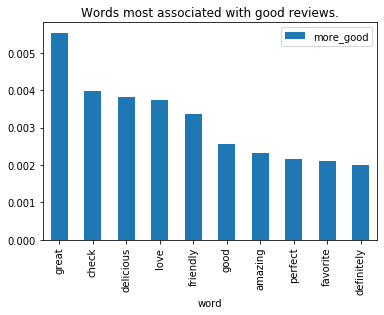

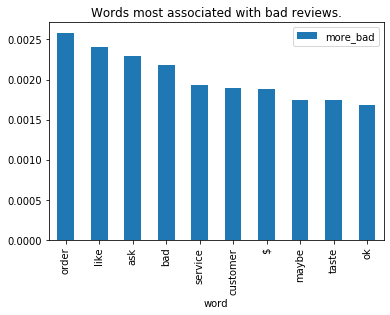

In [201]:
wc.sort_values(by='more_good', ascending=False)[['word', 'more_good']].head(10).plot(kind='bar', x ='word', title='Words most associated with good reviews.')
wc.sort_values(by='more_bad', ascending=False)[['word', 'more_bad']].head(10).plot(kind='bar', x ='word', title='Words most associated with bad reviews.')

One thing that can be seen from these graphs is that positive reviews tend to have clear, definitive, positive words. The reviews for bad places don't seems to have an overwhelming number of definitive negative descriptors. There are quite a few customer service related terms ('ask', 'service', 'order', 'customer'), possibly suggesting a specific descriptor of some sort of problem.

The word second most commonly associated with bad but not good resturaunts is 'like', which, being a positive word, comes as somewhat of a surprise. I personally think it's most likely people attempting to hedge their critisisms with something mildly positive, as 'like' is hardly the most extreme of praise-words, especially compared to the words associated with good places. Similarly, the word 'ok' makes an apearence here, I presume for similar reasons.

In [202]:
wcY1  = count(shops[shops['star_rating'] == 1]['lemmas'])
wcN1 = count(shops[shops['star_rating'] != 1]['lemmas'])
wc1 = pd.merge(wcY1, wcN1, how='inner', on='word', suffixes=('_Y', '_N'))
wc1['more_Y'] = wc1['pct_total_Y'] - wc1['pct_total_N']

wcY2  = count(shops[shops['star_rating'] == 2]['lemmas'])
wcN2 = count(shops[shops['star_rating'] != 2]['lemmas'])
wc2 = pd.merge(wcY2, wcN2, how='inner', on='word', suffixes=('_Y', '_N'))
wc2['more_Y'] = wc2['pct_total_Y'] - wc2['pct_total_N']

wcY3  = count(shops[shops['star_rating'] == 3]['lemmas'])
wcN3 = count(shops[shops['star_rating'] != 3]['lemmas'])
wc3 = pd.merge(wcY3, wcN3, how='inner', on='word', suffixes=('_Y', '_N'))
wc3['more_Y'] = wc3['pct_total_Y'] - wc3['pct_total_N']

wcY4  = count(shops[shops['star_rating'] == 4]['lemmas'])
wcN4 = count(shops[shops['star_rating'] != 4]['lemmas'])
wc4 = pd.merge(wcY4, wcN4, how='inner', on='word', suffixes=('_Y', '_N'))
wc4['more_Y'] = wc4['pct_total_Y'] - wc4['pct_total_N']

wcY5  = count(shops[shops['star_rating'] == 5]['lemmas'])
wcN5 = count(shops[shops['star_rating'] != 5]['lemmas'])
wc5 = pd.merge(wcY5, wcN5, how='inner', on='word', suffixes=('_Y', '_N'))
wc5['more_Y'] = wc5['pct_total_Y'] - wc5['pct_total_N']

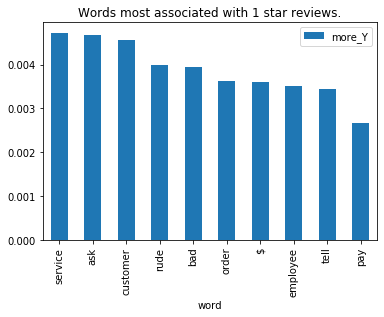

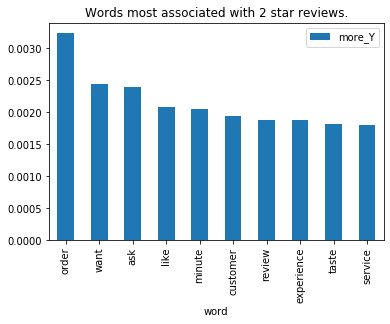

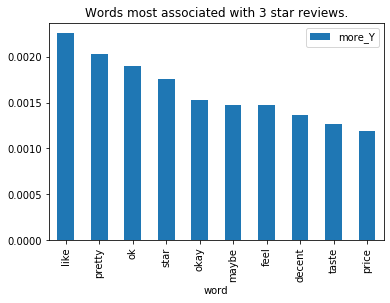

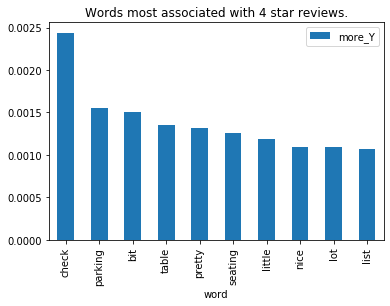

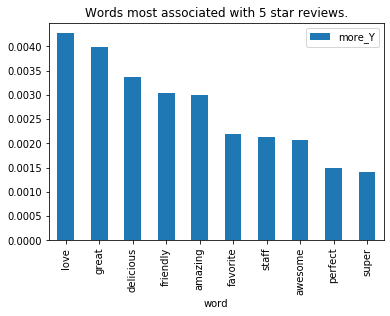

In [203]:
wc1.sort_values(by='more_Y', ascending=False)[['word', 'more_Y']].head(10).plot(kind='bar', x ='word', title='Words most associated with 1 star reviews.')
wc2.sort_values(by='more_Y', ascending=False)[['word', 'more_Y']].head(10).plot(kind='bar', x ='word', title='Words most associated with 2 star reviews.')
wc3.sort_values(by='more_Y', ascending=False)[['word', 'more_Y']].head(10).plot(kind='bar', x ='word', title='Words most associated with 3 star reviews.')
wc4.sort_values(by='more_Y', ascending=False)[['word', 'more_Y']].head(10).plot(kind='bar', x ='word', title='Words most associated with 4 star reviews.')
wc5.sort_values(by='more_Y', ascending=False)[['word', 'more_Y']].head(10).plot(kind='bar', x ='word', title='Words most associated with 5 star reviews.')

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

